# Diplodatos Kaggle Competition

A continuacion se presenta una exploracion de los datos de la competencia de Kaggle así como varios modelos de aprendizaje supervisado propuestos:


In [ ]:
# Importamos los paquetes requeridos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Data

In [ ]:
train_df = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/travel_insurance_prediction_train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/travel_insurance_prediction_test.csv")

## Exploramos los datos


El dataset consiste en un conjunto de clientes de una agencia de viajes y se brinda informacion acerca de cada cliente, tal como su edad, su trabajo, sus ingresos mensuales, como esta compuesta su familia, si ha viajado antes o no y si ha contratado seguro de viaje. 

In [ ]:
train_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [ ]:
test_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes
3,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes
4,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes


**TravelInsurance** es la columna que debemos predecir. Es decir, dada la informacion de cada cliente, debemos decidir si el mismo contratará un seguro de viaje la proxima vez que decida viajar. Dicha columna no se encuentra en los datos de test.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [ ]:
train_df.isna().sum()

Customer               0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
train_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000,1490.000000
mean,745.500000,29.667114,9.278188e+05,4.777181,0.275839,0.357047
std,430.270264,2.880994,3.811715e+05,1.640248,0.447086,0.479290
min,1.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,373.250000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,745.500000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1117.750000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1490.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


### Analisis de las distintas columnas



Text(0.5, 0, 'Ingresos Mensuales (USD)')

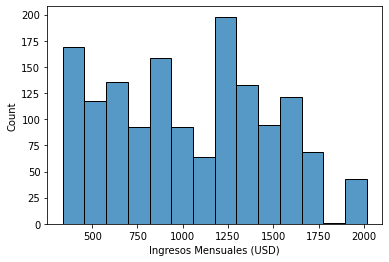

In [ ]:
# Ingresos mensuales
import seaborn as sn
sn.histplot(train_df.AnnualIncome/12/74.36) #74.36 Cambio de rupias indias a USD. 
plt.xlabel('Ingresos Mensuales (USD)')

Se observa una distribucion variable de entre 250 y 2000 USD de ingresos mensuales. 

Text(0.5, 0, 'Miembros del Grupo Familiar')

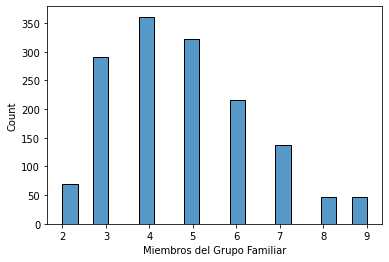

In [ ]:
#Miembros del grupo familiar
import seaborn as sn

sn.histplot(train_df.FamilyMembers) 
plt.xlabel('Miembros del Grupo Familiar')

Se observa que la mayoria de los clientes tiene familia con entre 1 y 5 hijo/as. 

In [ ]:
#Porcentaje de clientes con enfermedades cronicas. 

train_df['ChronicDiseases'].value_counts()/len(train_df['ChronicDiseases'])*100

0    72.416107
1    27.583893
Name: ChronicDiseases, dtype: float64

Solo un 27.6% de los clientes presentan enfermedades cronicas. 

In [ ]:
#Porcentaje de clientes que contrataron seguros de viaje con anterioridad. 

train_df['TravelInsurance'].value_counts()/len(train_df['TravelInsurance'])*100

0    64.295302
1    35.704698
Name: TravelInsurance, dtype: float64

Acá se observa que un 36% de los clientes han contratado seguros de viaje con anterioridad. 

De la descripcion del dataset de entrenamiento, vemos que tenemos clientes entre 25 y 35 años, cuyos ingresos mensuales oscilan entre 400 y 2000 USD. La mayoria de los grupos familiares tienen entre 3 y 5 miembros. 
Un 28% de les clientes tienen enfermedades crónicas. Y solo un 36% contrató seguro de viaje con anterioridad. 

Analicemos ahora cuantos de estos clientes viajaron y si los que SI viajaron, contrataron seguro. 

Veamos tmb si los que viajaron y contrataron seguro son personas con enfermedades cronicas. Se esperaria que al menos estas personas si contraten seguro. 

In [ ]:
train_df.EverTravelledAbroad

train_df['EverTravelledAbroad'].value_counts()/len(train_df['EverTravelledAbroad'])*100

No     80.671141
Yes    19.328859
Name: EverTravelledAbroad, dtype: float64

Tenemos un 81% de clientes que nunca viajaron. Veamos si el 19% restante cataloga como viajero frecuente. 

In [ ]:
train_df.EverTravelledAbroad

train_df['FrequentFlyer'].value_counts()/len(train_df['FrequentFlyer'])*100


No     78.724832
Yes    21.275168
Name: FrequentFlyer, dtype: float64

Lo curioso es que tenemos 21% de viajeros frecuentes. Gente que incluso no viajó nunca (al exterior) se considera viajero frecuente. Los seguros de viaje en general protegen en el exterior, se supone que dentro del propio pais, uno/a se encuentra protegido/a. Dado que los valores de los sueldos anuales están en rupias indias, podemos suponer que el país del cual son originarios los clientes es la India. Parece ser que allí la salud publica no es muy accesible. Si pensamos en Argentina, no es habitual que las personas que viajan dentro del país, contraten seguro de viajes. Pero en la India, podría ser que fuera necesario, por ende, vamos a considerar tmb está avriable a la hora de predecir si un cliente contratará seguro de viaje o no. 

In [ ]:
train_df[(train_df['FrequentFlyer']=='Yes') & (train_df['EverTravelledAbroad']=='Yes')].value_counts()

Customer  Age  Employment Type               GraduateOrNot  AnnualIncome  FamilyMembers  ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance
1482      31   Government Sector             Yes            1500000       7              0                Yes            Yes                  1                  1
757       34   Private Sector/Self Employed  Yes            1500000       4              1                Yes            Yes                  1                  1
393       28   Private Sector/Self Employed  Yes            1450000       6              0                Yes            Yes                  1                  1
399       30   Private Sector/Self Employed  No             1450000       9              0                Yes            Yes                  1                  1
404       34   Private Sector/Self Employed  No             1400000       3              0                Yes            Yes                  1                  1
                           

De hecho, solo 129 clientes (de los 317 que se consideran viajeros frecuentes), el 40% de los viajeros frecuentes, viajó al exterior.   

In [ ]:
train_df[ (train_df['TravelInsurance']==1) & (train_df['EverTravelledAbroad']=='Yes')].value_counts() # 

Customer  Age  Employment Type               GraduateOrNot  AnnualIncome  FamilyMembers  ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance
1482      31   Government Sector             Yes            1500000       7              0                Yes            Yes                  1                  1
384       33   Private Sector/Self Employed  Yes            1400000       3              0                No             Yes                  1                  1
519       26   Private Sector/Self Employed  Yes            1400000       4              0                No             Yes                  1                  1
509       31   Private Sector/Self Employed  Yes            1400000       4              1                No             Yes                  1                  1
508       26   Private Sector/Self Employed  Yes            1500000       2              1                Yes            Yes                  1                  1
                           

288 son los clientes que han viajado al exterior. De esos 288, 226 (78%) contrataron seguro. O sea que hay altas probabilidades de contratar seguro si se viaja al exterior. 

In [ ]:
train_df[ (train_df['ChronicDiseases']==1) & (train_df['EverTravelledAbroad']=='Yes') ].value_counts() # 

Customer  Age  Employment Type               GraduateOrNot  AnnualIncome  FamilyMembers  ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance
1469      33   Private Sector/Self Employed  Yes            1400000       6              1                No             Yes                  1                  1
526       26   Private Sector/Self Employed  Yes            1250000       4              1                No             Yes                  0                  1
449       31   Private Sector/Self Employed  Yes            1400000       4              1                No             Yes                  0                  1
462       31   Private Sector/Self Employed  Yes            1350000       3              1                Yes            Yes                  1                  1
479       33   Private Sector/Self Employed  Yes            1500000       5              1                Yes            Yes                  1                  1
                           

Finalmente, vemos que 86 personas con enfermades cronicas viajaron al exterior.

In [ ]:
train_df[ (train_df['ChronicDiseases']==1) & (train_df['EverTravelledAbroad']=='Yes') & (train_df['TravelInsurance']==1) ].value_counts() # 

Customer  Age  Employment Type               GraduateOrNot  AnnualIncome  FamilyMembers  ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance
1469      33   Private Sector/Self Employed  Yes            1400000       6              1                No             Yes                  1                  1
336       35   Private Sector/Self Employed  No             800000        6              1                No             Yes                  1                  1
645       25   Private Sector/Self Employed  No             1350000       5              1                No             Yes                  1                  1
605       26   Private Sector/Self Employed  Yes            1400000       4              1                No             Yes                  1                  1
604       32   Government Sector             Yes            350000        3              1                No             Yes                  1                  1
                           

De esas 86 personas, 63 (un 73%) contrataron seguro. 

In [ ]:
test_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,497.000000,497.000000,4.970000e+02,497.00000,497.000000
mean,1739.000000,29.599598,9.475855e+05,4.68008,0.283702
std,143.615807,3.010506,3.635818e+05,1.51347,0.451248
min,1491.000000,25.000000,3.000000e+05,2.00000,0.000000
25%,1615.000000,28.000000,6.500000e+05,4.00000,0.000000
50%,1739.000000,29.000000,9.500000e+05,4.00000,0.000000
75%,1863.000000,32.000000,1.250000e+06,6.00000,1.000000
max,1987.000000,35.000000,1.750000e+06,9.00000,1.000000


Con todo esto en mente, proponemos los siguientes modelos.

## Distintos Modelos

En esta sección presentamos las metricas basadas en diferentes clasificadores.


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

### Transformamos las columnas en features

Primero necesitamos transformar las columnas en features. El tipo de funciones que utilicemos tendrá un impacto directo en el resultado final. Hemos discretizado algunas características numéricas y hemos hecho one-hot encoding de otras. 

In [ ]:
transformer = make_column_transformer(
    (KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
     ["Employment Type", "GraduateOrNot", "FamilyMembers", "FrequentFlyer", "EverTravelledAbroad"]),
    remainder="passthrough")		

Transformamos los datos de entrenamiento de test. Para evitar el sobreajuste, eliminamos la columna `Cliente`. Tmb eliminamos la columna` TravelInsurance`, ya que es lo que deseamos predecir.

In [ ]:
# The data for training the model
X_train = transformer.fit_transform(train_df.drop(columns=["Customer", "TravelInsurance"]))
y_train = train_df["TravelInsurance"].values

# The test data is only for generating the submission
X_test = transformer.transform(test_df.drop(columns=["Customer"]))
print(X_test)

[[2. 3. 0. ... 1. 0. 0.]
 [2. 1. 0. ... 1. 0. 1.]
 [3. 4. 1. ... 0. 1. 0.]
 ...
 [2. 2. 0. ... 1. 0. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [1. 2. 1. ... 1. 0. 0.]]


### Random Forest Classifier

In [ ]:
from sklearn import ensemble

In [ ]:
clf = ensemble.RandomForestClassifier(n_estimators=100, random_state=3, max_depth=13)
clf.fit(X_train, y_train);

##### Check Results

We can print the results of the best estimator found on the whole training set (we could also set apart a validation set if we find it useful).

In [ ]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       958
           1       0.93      0.73      0.82       532

    accuracy                           0.89      1490
   macro avg       0.90      0.85      0.87      1490
weighted avg       0.89      0.89      0.88      1490



##### Generate the output

The last thing we do is generating a file that should be *submitted* on kaggle

In [ ]:
test_id = test_df["Customer"]
test_pred = clf.predict(X_test)

submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])
submission.to_csv("./travel_insurance_submission_RF4_2_prueba.csv", header=True, index=False)

In [ ]:
submission

,Customer,TravelInsurance
0,1491,0
1,1492,0
2,1493,1
3,1494,1
4,1495,1
...,...,...
492,1983,1
493,1984,0
494,1985,0
495,1986,1


### OPTIMIZED Random Forest Classifier

Empleamos RandomizedSearchCV con la intencion de encontrar los parametros que optimicen la clasificacion. 

Este es el modelo que mejor nos ha funcionado y nos ha colocado en el primer puesto de la tabla de la Competencia. 

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def get_rf_parameters():
    n_estimators = [10, 50, 100,200]
    max_features = ['auto', 'sqrt', 'log2']
    max_depth = [5, 10, 20, 50, None]
    min_samples_split = [2, 4, 6, 8]
    min_samples_leaf = [1, 2, 4, 6]
    bootstrap = [True, False]

    random_grid = {'n_estimators':n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap':bootstrap}
    model = ensemble.RandomForestClassifier(random_state =42)
    rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 5, cv = 3, verbose =  2, random_state = 42)
    rf_random.fit(X_train, y_train)
    parameters = rf_random.best_params_
    print("Best Parameters: ", parameters)
    
    return parameters


rf_par = get_rf_parameters()

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, bootstrap=False, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, bootstrap=False, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, bootstrap=False, total=   0.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=200, min_sam

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.4s finished


In [ ]:
clf = ensemble.RandomForestClassifier(**rf_par)
clf.fit(X_train, y_train);

In [ ]:
clf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### Check Results

We can print the results of the best estimator found on the whole training set (we could also set apart a validation set if we find it useful).

In [ ]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       958
           1       0.92      0.65      0.76       532

    accuracy                           0.85      1490
   macro avg       0.88      0.81      0.83      1490
weighted avg       0.86      0.85      0.85      1490



##### Generate the output

The last thing we do is generating a file that should be *submitted* on kaggle

In [ ]:
test_id = test_df["Customer"]
test_pred = clf.predict(X_test)

submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])
submission.to_csv("./travel_insurance_submission_RF4_optmzd.csv", header=True, index=False)

In [ ]:
submission

,Customer,TravelInsurance
0,1491,0
1,1492,0
2,1493,1
3,1494,1
4,1495,1
...,...,...
492,1983,1
493,1984,0
494,1985,0
495,1986,1


### SGDC Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'loss': ['hinge', 'log', 'squared_epsilon_insensitive','squared_loss','modified_huber','perceptron'],
    'learning_rate': ['optimal'],
    'tol': [1e-5],
    'shuffle': [False],
    'epsilon': [0.01, 0.02, 0.05, 0.001],
    'alpha': [0.001, 0.0001,0.00001, 0.02, 0.005]
}

In [ ]:
clf = SGDClassifier(random_state=0)

best_clf = GridSearchCV(clf, param_grid, scoring='f1', cv=5)

best_clf.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

In [ ]:
best_clf

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=0,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, ver...
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.0001, 1e-05, 0.02, 0.005],
                         'epsilon': [0.01, 0.02, 0.05, 0.001],
                         'learning_rate': ['optimal'],
                         'loss': ['hinge', 'log', 'squared_epsilon_insensitive',
  

##### Check Results

We can print the results of the best estimator found on the whole training set (we could also set apart a validation set if we find it useful).

In [ ]:
print(classification_report(y_train, best_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       958
           1       0.77      0.50      0.61       532

    accuracy                           0.77      1490
   macro avg       0.77      0.71      0.72      1490
weighted avg       0.77      0.77      0.75      1490



##### Generate the output

The last thing we do is generating a file that should be *submitted* on kaggle

In [ ]:
test_id = test_df["Customer"]
test_pred = best_clf.predict(X_test)

submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])
submission.to_csv("./travel_insurance_submission_SGDC.csv", header=True, index=False)

In [ ]:
submission

,Customer,TravelInsurance
0,1491,0
1,1492,0
2,1493,1
3,1494,1
4,1495,1
...,...,...
492,1983,1
493,1984,0
494,1985,0
495,1986,0


### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Optimicemos los HP:

def get_svm_parameters():
    C = [0.1, 1, 10,]
    gamma = [1, 0.1, 0.01]
    kernel = ['rbf', 'linear','poli']
    random_grid = {'C': C,'gamma': gamma, 'kernel':kernel}  
    tol = 1e-5
    model = SVC(random_state =42)
    svm_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, 
                             n_iter = 5, cv = 3, verbose =  2, random_state = 42)
    svm_random.fit(X_train, y_train)
    parameters = svm_random.best_params_
    
    return parameters
    
svm_par = get_svm_parameters()

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] kernel=poli, gamma=0.01, C=0.1 ..................................
[CV] ................... kernel=poli, gamma=0.01, C=0.1, total=   0.0s
[CV] kernel=poli, gamma=0.01, C=0.1 ..................................
[CV] ................... kernel=poli, gamma=0.01, C=0.1, total=   0.0s
[CV] kernel=poli, gamma=0.01, C=0.1 ..................................
[CV] ................... kernel=poli, gamma=0.01, C=0.1, total=   0.0s
[CV] kernel=linear, gamma=0.1, C=1 ...................................
[CV] .................... kernel=linear, gamma=0.1, C=1, total=   0.0s
[CV] kernel=linear, gamma=0.1, C=1 ...................................
[CV] .................... kernel=linear, gamma=0.1, C=1, total=   0.0s
[CV] kernel=linear, gamma=0.1, C=1 ...................................
[CV] .................... kernel=linear, gamma=0.1, C=1, total=   0.0s
[CV] kernel=rbf, gamma=1, C=1 ........................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'poli' is not in list

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'poli' is not in list

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'poli' is not in list

  FitFailedWarning)


[CV] ......................... kernel=rbf, gamma=1, C=1, total=   0.1s
[CV] kernel=rbf, gamma=1, C=1 ........................................
[CV] ......................... kernel=rbf, gamma=1, C=1, total=   0.1s
[CV] kernel=rbf, gamma=0.1, C=10 .....................................
[CV] ...................... kernel=rbf, gamma=0.1, C=10, total=   0.1s
[CV] kernel=rbf, gamma=0.1, C=10 .....................................
[CV] ...................... kernel=rbf, gamma=0.1, C=10, total=   0.1s
[CV] kernel=rbf, gamma=0.1, C=10 .....................................
[CV] ...................... kernel=rbf, gamma=0.1, C=10, total=   0.1s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] ....................... kernel=rbf, gamma=1, C=0.1, total=   0.1s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] ....................... kernel=rbf, gamma=1, C=0.1, total=   0.1s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.7s finished


In [ ]:
clf = SVC(**svm_par,random_state=0)

clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

##### Check Results

We can print the results of the best estimator found on the whole training set (we could also set apart a validation set if we find it useful).

In [ ]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       958
           1       0.92      0.62      0.74       532

    accuracy                           0.84      1490
   macro avg       0.87      0.79      0.81      1490
weighted avg       0.86      0.84      0.83      1490



##### Generate the output

The last thing we do is generating a file that should be *submitted* on kaggle

In [ ]:
test_id = test_df["Customer"]
test_pred = clf.predict(X_test)

submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])
submission.to_csv("./travel_insurance_submission_SVM.csv", header=True, index=False)

In [ ]:
submission

,Customer,TravelInsurance
0,1491,0
1,1492,0
2,1493,1
3,1494,1
4,1495,1
...,...,...
492,1983,1
493,1984,0
494,1985,0
495,1986,0


### Vooting Clasifier RF4 Y SVM

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [ ]:
def get_rf_parameters():
    n_estimators = [10, 50, 100,200]
    max_features = ['auto', 'sqrt', 'log2']
    max_depth = [5, 10, 20, 50, None]
    min_samples_split = [2, 4, 6, 8]
    min_samples_leaf = [1, 2, 4, 6]
    bootstrap = [True, False]

    random_grid = {'n_estimators':n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap':bootstrap}
    model = ensemble.RandomForestClassifier(random_state =42)
    rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 5, cv = 6, verbose =  2, random_state = 65)
    rf_random.fit(X_train, y_train)
    parameters = rf_random.best_params_
    print("Best Parameters: ", parameters)
    
    return parameters


rf_par = get_rf_parameters()

Fitting 6 folds for each of 5 candidates, totalling 30 fits
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.2s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.2s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.2s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.2s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.2s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.8s finished


In [ ]:
clf = ensemble.RandomForestClassifier(**rf_par)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
def get_svm_parameters():
    C = [0.1, 1, 10,]
    gamma = [1, 0.1, 0.01, 0.02]
    kernel = ['rbf', 'linear','poli']
    random_grid = {'C': C,'gamma': gamma, 'kernel':kernel}  
    tol = 1e-5
    model = SVC(random_state =42)
    svm_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, 
                             n_iter = 5, cv = 3, verbose =  2, random_state = 42)
    svm_random.fit(X_train, y_train)
    parameters = svm_random.best_params_
    
    return parameters
    
svm_par = get_svm_parameters()

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] kernel=poli, gamma=0.02, C=10 ...................................
[CV] .................... kernel=poli, gamma=0.02, C=10, total=   0.0s
[CV] kernel=poli, gamma=0.02, C=10 ...................................
[CV] .................... kernel=poli, gamma=0.02, C=10, total=   0.0s
[CV] kernel=poli, gamma=0.02, C=10 ...................................
[CV] .................... kernel=poli, gamma=0.02, C=10, total=   0.0s
[CV] kernel=linear, gamma=1, C=1 .....................................
[CV] ...................... kernel=linear, gamma=1, C=1, total=   0.0s
[CV] kernel=linear, gamma=1, C=1 .....................................
[CV] ...................... kernel=linear, gamma=1, C=1, total=   0.0s
[CV] kernel=linear, gamma=1, C=1 .....................................
[CV] ...................... kernel=linear, gamma=1, C=1, total=   0.0s
[CV] kernel=poli, gamma=1, C=10 ......................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'poli' is not in list

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'poli' is not in list

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'poli' is not in list

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packa

[CV] ..................... kernel=rbf, gamma=0.01, C=10, total=   0.1s
[CV] kernel=rbf, gamma=0.01, C=10 ....................................
[CV] ..................... kernel=rbf, gamma=0.01, C=10, total=   0.1s
[CV] kernel=linear, gamma=0.1, C=1 ...................................
[CV] .................... kernel=linear, gamma=0.1, C=1, total=   0.0s
[CV] kernel=linear, gamma=0.1, C=1 ...................................
[CV] .................... kernel=linear, gamma=0.1, C=1, total=   0.0s
[CV] kernel=linear, gamma=0.1, C=1 ...................................
[CV] .................... kernel=linear, gamma=0.1, C=1, total=   0.0s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished


In [ ]:
clf_SVC = SVC(**svm_par,random_state=0)

clf_SVC.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
param_grid = {
    'loss': ['hinge', 'log', 'squared_epsilon_insensitive','squared_loss','modified_huber','perceptron'],
    'learning_rate': ['optimal'],
    'epsilon': [0.05, 0.02, 0.01],
    'alpha': [0.001, 0.0001,0.00001, 0.02, 0.005]
}

In [ ]:
clf = SGDClassifier(random_state=0)

best_clf_SGDC = GridSearchCV(clf, param_grid, scoring='f1', cv=5)

best_clf_SGDC.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=0,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.0001, 1e-05, 0.02, 0.005],
                         'epsilon': [0.05, 0.02, 0.01],
                         'learning_rate': ['optimal'],
                         'loss

In [ ]:
eclf1 = VotingClassifier(estimators=[
       ('Random', clf), ('SVM',clf_SVC), ('best_clf_SGDC', best_clf_SGDC)], voting='hard', weights=[2,1,1],
        flatten_transform=True)
eclf1 = eclf1.fit(X_train, y_train)
print(eclf1.predict(X_train))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[0 0 0 ... 0 0 0]


In [ ]:
print(classification_report(y_train, eclf1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.76      0.92      0.84       958
           1       0.78      0.48      0.60       532

    accuracy                           0.77      1490
   macro avg       0.77      0.70      0.72      1490
weighted avg       0.77      0.77      0.75      1490



In [ ]:
test_id = test_df["Customer"]
test_pred = eclf1.predict(X_test)

submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])
submission.to_csv("./travel_insurance_vooting_clasifier.csv", header=True, index=False)

In [ ]:
submission

,Customer,TravelInsurance
0,1491,0
1,1492,0
2,1493,1
3,1494,1
4,1495,1
...,...,...
492,1983,1
493,1984,0
494,1985,0
495,1986,0


### XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [ ]:
param = {'max_depth': 3, 'eta': 0.4, 'objective': 'binary:hinge'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [ ]:
num_round = 30
bst = xgb.train(param, dtrain, num_round)
bst.predict(dtest)

array([0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1.

In [ ]:
print(classification_report(y_train, bst.predict(dtrain)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       958
           1       0.90      0.61      0.73       532

    accuracy                           0.84      1490
   macro avg       0.86      0.79      0.81      1490
weighted avg       0.85      0.84      0.83      1490



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

sm = SMOTE(random_state=2, k_neighbors=15, n_jobs=15)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
dtrain = xgb.DMatrix(X_train_res, label=y_train_res)
dtest = xgb.DMatrix(X_test)

In [ ]:
num_round = 5
bst = xgb.train(param, dtrain, num_round)
bst.predict(dtest)

array([0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1.

In [ ]:
print(classification_report(y_train_res, bst.predict(dtrain)))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       958
           1       0.81      0.69      0.75       958

    accuracy                           0.77      1916
   macro avg       0.77      0.77      0.77      1916
weighted avg       0.77      0.77      0.77      1916



In [ ]:
test_id = test_df["Customer"]
test_pred = bst.predict(dtest)

submission = pd.DataFrame(list(zip(test_id, [int(x) for x in test_pred])), columns=["Customer", "TravelInsurance"])
submission.to_csv("./travel_insurance_submission_XGBOOST_clasif.csv", header=True, index=False)

### Filtrando un feature utilizando Optimized Random Forest Classifier

Supongamos que deseamos eliminar la columna de edad, dado que el rango de edad no varía mucho (10 años). 

In [ ]:
transformer = make_column_transformer(
    (KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), [ "AnnualIncome"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
     ["Employment Type","FamilyMembers", "GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad"]),
    remainder="passthrough")		

In [ ]:
# The data for training the model
X_train = transformer.fit_transform(train_df.drop(columns=["Customer","Age", "TravelInsurance"]))
y_train = train_df["TravelInsurance"].values

# The test data is only for generating the submission
X_test = transformer.transform(test_df.drop(columns=["Customer" ,"Age"]))
print(X_test)

[[3. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 0. 1.]
 [4. 1. 0. ... 0. 1. 0.]
 ...
 [2. 0. 1. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 [2. 1. 0. ... 1. 0. 0.]]


In [ ]:
def get_rf_parameters():
    n_estimators = [10, 50, 100,200]
    max_features = ['auto', 'sqrt', 'log2']
    max_depth = [5, 10, 20, 50, None]
    min_samples_split = [2, 4, 6, 8]
    min_samples_leaf = [1, 2, 4, 6]
    bootstrap = [True, False]

    random_grid = {'n_estimators':n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap':bootstrap}
    model = ensemble.RandomForestClassifier(random_state =42)
    rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 5, cv = 3, verbose =  2, random_state = 42)
    rf_random.fit(X_train, y_train)
    parameters = rf_random.best_params_
    print("Best Parameters: ", parameters)
    
    return parameters


rf_par = get_rf_parameters()

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, bootstrap=False, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, bootstrap=False, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=log2, max_depth=5, bootstrap=False, total=   0.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=200, min_sam

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.3s finished


Best Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [ ]:
clf = ensemble.RandomForestClassifier(**rf_par)
clf.fit(X_train, y_train);

Obtenemos entonces las siguientes metricas, que son notoriamente inferiores a las metricas empleando todas las columnas. 

In [ ]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       958
           1       0.87      0.54      0.67       532

    accuracy                           0.81      1490
   macro avg       0.83      0.75      0.77      1490
weighted avg       0.82      0.81      0.79      1490



In [ ]:
test_id = test_df["Customer"]
test_pred = clf.predict(X_test)

submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])
submission.to_csv("./travel_insurance_submission_RF4_optmzd_sin_age_op.csv", header=True, index=False)

Ahora, si eliminamos la columna GRADUADE OR NOT?, obtenemos las siguiente metricas. Que mejoran con respecto al haber eliminado la columna Age pero igual no alcanzan a las metricas usando todas las columnas. 

             precision    recall  f1-score   support

           0       0.83      0.97      0.89       958
           1       0.92      0.63      0.75       532

    accuracy                           0.85      1490
    macro avg      0.87      0.80      0.82      1490
    weighted avg   0.86      0.85      0.84      1490





Finalmente, si decidimos eliminar la columna FrequentFlyer que pensabamos podia ser cuestionable, obtenemos las siguiente metricas: 


              precision    recall  f1-score   support

           0       0.82      0.96      0.88       958
           1       0.89      0.61      0.73       532

    accuracy                           0.83      1490
    macro avg      0.85      0.79      0.80      1490
    weighted avg   0.84      0.83      0.83      1490

Que son mas bajas que las metricas al eliminar la columna "graduade or not"

Finalmente, lo que menos afecta parece ser eliminar dicha columna. Probamos si obtenemos mejores resultados en la submission y vemos que nos da un score de 0.8181. Finalmente, la mejor clasificacion resultó con RF con los parametros optimizados empleando RandomizedSearchCV.  